In [415]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [416]:
def load_image(file_name):
    with gzip.open(file_name,"r") as f:
        magic_number = int.from_bytes(f.read(4),"big")
        image_count = int.from_bytes(f.read(4),"big")
        image_row = int.from_bytes(f.read(4),"big")
        image_collumn = int.from_bytes(f.read(4),"big")
        image_data = f.read()
        image = np.frombuffer(image_data,dtype=np.uint8).reshape(
            image_count,image_row,image_collumn
        )
    return image

In [417]:
def load_label(file_name):
    with gzip.open(file_name,"r") as f:
        magic_number = int.from_bytes(f.read(4),"big")
        image_count = int.from_bytes(f.read(4),"big")
        image_data = f.read()
        image = np.frombuffer(image_data,dtype=np.uint8)
    return image

In [418]:
# train_mnist_img = load_image("train-images-idx3-ubyte.gz")
# test_mnist_img = load_image("t10k-images-idx3-ubyte.gz")
# print(train_mnist_img.shape)
# print(test_mnist_img.shape)

In [419]:
train_mnist_img = load_image("train-images-idx3-ubyte.gz")
test_mnist_img = load_image("t10k-images-idx3-ubyte.gz")

train_mnist_label = load_label("train-labels-idx1-ubyte.gz")
test_mnist_label = load_label("t10k-labels-idx1-ubyte.gz")

print(train_mnist_img.shape , train_mnist_label.shape)
print(test_mnist_img.shape , test_mnist_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [420]:
# print(train_mnist_img[0])
# fig,ax = plt.subplots(1,2)
# import random
# ax[0].imshow(train_mnist_img[0])
# ax[1].imshow(train_mnist_img[0],plt.cm.binary)

(28, 28)


Text(0.5, 0, '3')

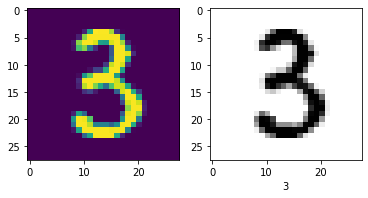

In [421]:

idx = np.random.randint(1,60000,1)

print(train_mnist_img[0].shape)
fig,ax = plt.subplots(1,2)
ax[0].imshow(train_mnist_img[idx[0]])
ax[1].imshow(train_mnist_img[idx[0]],plt.cm.binary)
plt.xlabel(train_mnist_label[idx[0]])

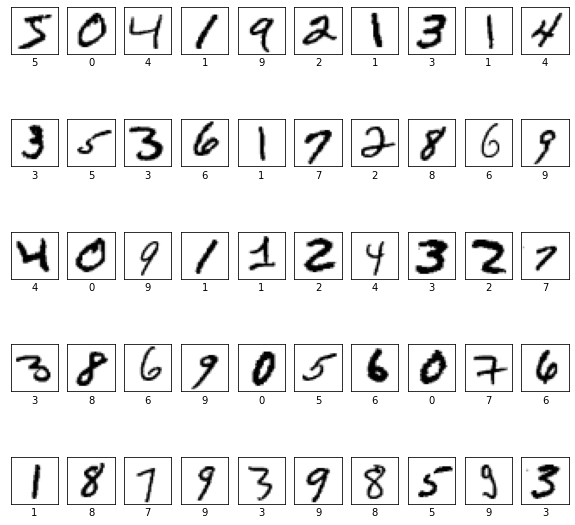

In [422]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = train_mnist_img[i]
    plt.imshow(im,plt.cm.binary)
    plt.xlabel(train_mnist_label[i])
plt.show()


In [423]:
print(train_mnist_label.shape)
print(train_mnist_label[0])

(60000,)
5


In [424]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(train_mnist_label,10)
y_test = tf.keras.utils.to_categorical(test_mnist_label,10)
print(test_mnist_label[0],y_train[0])

7 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


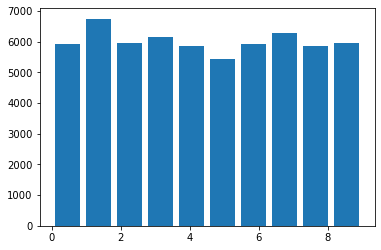

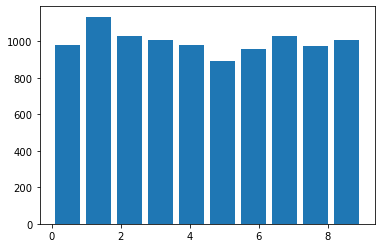

In [425]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(28,3,3),activation='ralu',input_shape=(28.28.3))
count,bins = np.histogram(train_mnist_label)
plt.hist(bins[:-1],bins,weights=count,rwidth=0.8)
plt.show()

count,bins = np.histogram(test_mnist_label)
plt.hist(bins[:-1],bins,weights=count,rwidth=0.8)
plt.show()

In [426]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_shape=(784,), activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


In [427]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [428]:
train_data = train_mnist_img.reshape(train_mnist_img.shape[0],-1)
test_data = test_mnist_img.reshape(test_mnist_img.shape[0],-1)
print(train_data.shape,test_data.shape)

(60000, 784) (10000, 784)


In [429]:
from random import shuffle

batch_size = 100
epochs = 10
history = model.fit(
    train_data ,y_train,
    batch_size = batch_size,
    shuffle=True,
    epochs = epochs)


Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 2.0852 - accuracy: 0.2493
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 1.8818 - accuracy: 0.2868
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 1.7679 - accuracy: 0.2914
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 1.7055 - accuracy: 0.2929
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 1.6888 - accuracy: 0.2960
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 1.6600 - accuracy: 0.3009
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 1.6054 - accuracy: 0.3032
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 1.5963 - accuracy: 0.3031
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 1.6245 - accuracy: 0.3025
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 1.6220 - accuracy: 0.2995

In [430]:
_, train_acc = model.evaluate(train_data , y_train)
_, test_acc = model.evaluate(test_data , y_test)
print("Accuracy",train_acc,test_acc)

313/313 [==============================] - 0s 964us/step - loss: 1.5421 - accuracy: 0.3046
Accuracy 0.3019166588783264 0.3046000003814697


In [431]:
idx = 9999
data = [test_data[idx]]
test = np.array(data)
result = model.predict(test)
print(result)#ผลที่ทายทั้งหมด
p_class = np.argmax(result,axis=1)
print("predict = ",p_class,"answer = ",y_test[idx],"labels = ",test_mnist_label[idx])

1/1 [==============================] - 0s 46ms/step
[[0.03396864 0.01164478 0.20017995 0.19760692 0.0132791  0.15626499
  0.19240184 0.00811957 0.17727701 0.00925712]]
predict =  [2] answer =  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] labels =  6


In [432]:
#แสเงในการทายทั้งหมด 10000 ครั้ง ภาพ ผิดกี่ภาพ และเลขที่ทายผิดบ่อย ๆ คือเลขอะไรบ้าง
#แสดงภาพที่ผิดเป็นอะไร และเฉลยเป็นอะไร